<a href="https://colab.research.google.com/github/Abhishek416/CAD_ML/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import warnings
import re
warnings.filterwarnings("ignore")

# Third party packages
import pandas as pd   # for reading data
import numpy as np     #for array
import seaborn as sns        # data visulaisation
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import iplot

from sklearn.preprocessing import StandardScaler         # for standerdisation of data
from sklearn import model_selection
from sklearn.model_selection import train_test_split         # for splitting data
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

sns.set(context= "notebook", color_codes=True)
plt.style.use('bmh')

pyo.init_notebook_mode()

%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
# Read the CSV file and display first 10 rows
df=pd.read_csv('/content/pca-smote-applied.csv')
df.head(4)
df.columns = [i.replace(" ", "_").replace("(%)", "_perc").replace("(dB)", "_db").replace(":", "_").lower() for i in df.columns]
df.columns = [re.sub(r"\((.+)\)", "", i) for i in df.columns]

df

-0.407st_slope=up+0.349st_slope=flat+0.349exerciseangina=y+0.344chestpaintype=asy-0.301maxhr...  \
0                                             -3.152396                                                 
1                                             -0.545831                                                 
2                                             -1.689500                                                 
3                                              1.635251                                                 
4                                             -1.564639                                                 
...                                                 ...                                                 
1011                                          -2.099234                                                 
1012                                          -2.190539                                                 
1013                                          -2.526767                                                 
1014                                          -2.663835                                                 
1015                                          -2.578531                                                 

      '-0.613restingecg=normal+0.546restingecg=lvh+0.21_cholesterol+0.209restingecg=st+0.193age...'  \
0                                             -0.501032                                               
1                                             -0.087403                                               
2                                              0.626390                                               
3                                             -1.325109                                               
4                                             -0.346491                                               
...                                                 ...                                               
1011                                          -0.082356                                               
1012                                          -0.153408                                               
1013                                           2.505797                                               
1014                                          -0.382265                                               
1015                                           0.012988                                               

      0.499cholesterol-0.492restingecg=st-0.349fastingbs+0.256st_slope=flat+0.242restingecg=lvh...  \
0                                              0.464827                                              
1                                              1.205881                                              
2                                             -1.701013                                              
3                                              1.752737                                              
4                                             -0.715411                                              
...                                                 ...                                              
1011                                           0.013209                                              
1012                                          -0.423416                                              
1013                                           1.098056                                              
1014                                          -0.034844                                              
1015                                           0.149146                                              

      0.735chestpaintype=nap-0.392chestpaintype=ata-0.332chestpaintype=asy+0.232st_slope=flat-0.178restingecg=st...  \
0                                             -1.142340                                                               
1                                            

In [ ]:
print(f"The shape of the DatFrame is: {df.shape}, which means there are {df.shape[0]} rows and {df.shape[1]} columns.")


The shape of the DatFrame is: (1016, 15), which means there are 1016 rows and 15 columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 15 columns):
 #   Column                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                         --------------  -----  
 0   -0.407st_slope=up+0.349st_slope=flat+0.349exerciseangina=y+0.344chestpaintype=asy-0.301maxhr...                1016 non-null   float64
 1   '-0.613restingecg=normal+0.546restingecg=lvh+0.21_cholesterol+0.209restingecg=st+0.193age...'                  1016 non-null   float64
 2   0.499cholesterol-0.492restingecg=st-0.349fastingbs+0.256st_slope=flat+0.242restingecg=lvh...                   1016 non-null   float64
 3   0.735chestpaintype=nap-0.392chestpaintype=ata-0.332chestpaintype=asy+0.232st_slope=flat-0.178restingecg=st...  1016 non-null   float64
 4   0.726st_slope=down-0.394st_slope=flat+0.322oldpe

In [ ]:
# Check if any of the columns have null values
print(df.isnull().sum())

-0.407st_slope=up+0.349st_slope=flat+0.349exerciseangina=y+0.344chestpaintype=asy-0.301maxhr...                  0
'-0.613restingecg=normal+0.546restingecg=lvh+0.21_cholesterol+0.209restingecg=st+0.193age...'                    0
0.499cholesterol-0.492restingecg=st-0.349fastingbs+0.256st_slope=flat+0.242restingecg=lvh...                     0
0.735chestpaintype=nap-0.392chestpaintype=ata-0.332chestpaintype=asy+0.232st_slope=flat-0.178restingecg=st...    0
0.726st_slope=down-0.394st_slope=flat+0.322oldpeak-0.315restingecg=st+0.193restingecg=normal...                  0
0.587restingbp-0.352chestpaintype=asy+0.349age-0.347restingecg=lvh+0.285chestpaintype=ata...                     0
'-0.726chestpaintype=ta+0.366chestpaintype=nap-0.285fastingbs+0.2__exerciseangina=y+0.2__restingecg=st...'       0
0.466restingecg=st-0.386age-0.33restingecg=lvh+0.295chestpaintype=ta-0.286restingbp...                           0
-0.792sex=f-0.404fastingbs+0.252restingbp+0.164st_slope=up+0.157chestpaintype=ta

In [ ]:
df_summary = df.describe()
df_summary

-0.407st_slope=up+0.349st_slope=flat+0.349exerciseangina=y+0.344chestpaintype=asy-0.301maxhr...  \
count                                       1.016000e+03                                                 
mean                                        1.279528e-08                                                 
std                                         1.984621e+00                                                 
min                                        -3.769568e+00                                                 
25%                                        -1.792053e+00                                                 
50%                                         7.359700e-02                                                 
75%                                         1.760150e+00                                                 
max                                         4.013417e+00                                                 

       '-0.613restingecg=normal+0.546restingecg=lvh+0.21_cholesterol+0.209restingecg=st+0.193age...'  \
count                                       1.016000e+03                                               
mean                                        1.673228e-08                                               
std                                         1.362835e+00                                               
min                                        -2.678329e+00                                               
25%                                        -1.019007e+00                                               
50%                                        -3.685395e-01                                               
75%                                         1.041359e+00                                               
max                                         4.137233e+00                                               

       0.499cholesterol-0.492restingecg=st-0.349fastingbs+0.256st_slope=flat+0.242restingecg=lvh...  \
count                                       1.016000e+03                                              
mean                                       -5.905512e-09                                              
std                                         1.235037e+00                                              
min                                        -4.401234e+00                                              
25%                                        -7.162625e-01                                              
50%                                         9.871850e-02                                              
75%                                         8.581455e-01                                              
max                                         3.283985e+00                                              

       0.735chestpaintype=nap-0.392chestpaintype=ata-0.332chestpaintype=asy+0.232st_slope=flat-0.178restingecg=st...  \
count                                       1.016000e+03                                                               
mean                                        6.889764e-09                                                               
std                                         1.179451e+00                                                               
min                                        -1.915738e+00                                                               
25%                                        -9.439283e-01                                                               
50%                                        -2.746475e-01                                                               
75%                                         6.213933e-01                                                               
max                                         3.326387e+00                                                               

       0.726st_slope=down-0.394st_slope=flat+0.322oldpeak-0.315restingecg=st+0.193restingecg=normal...  \


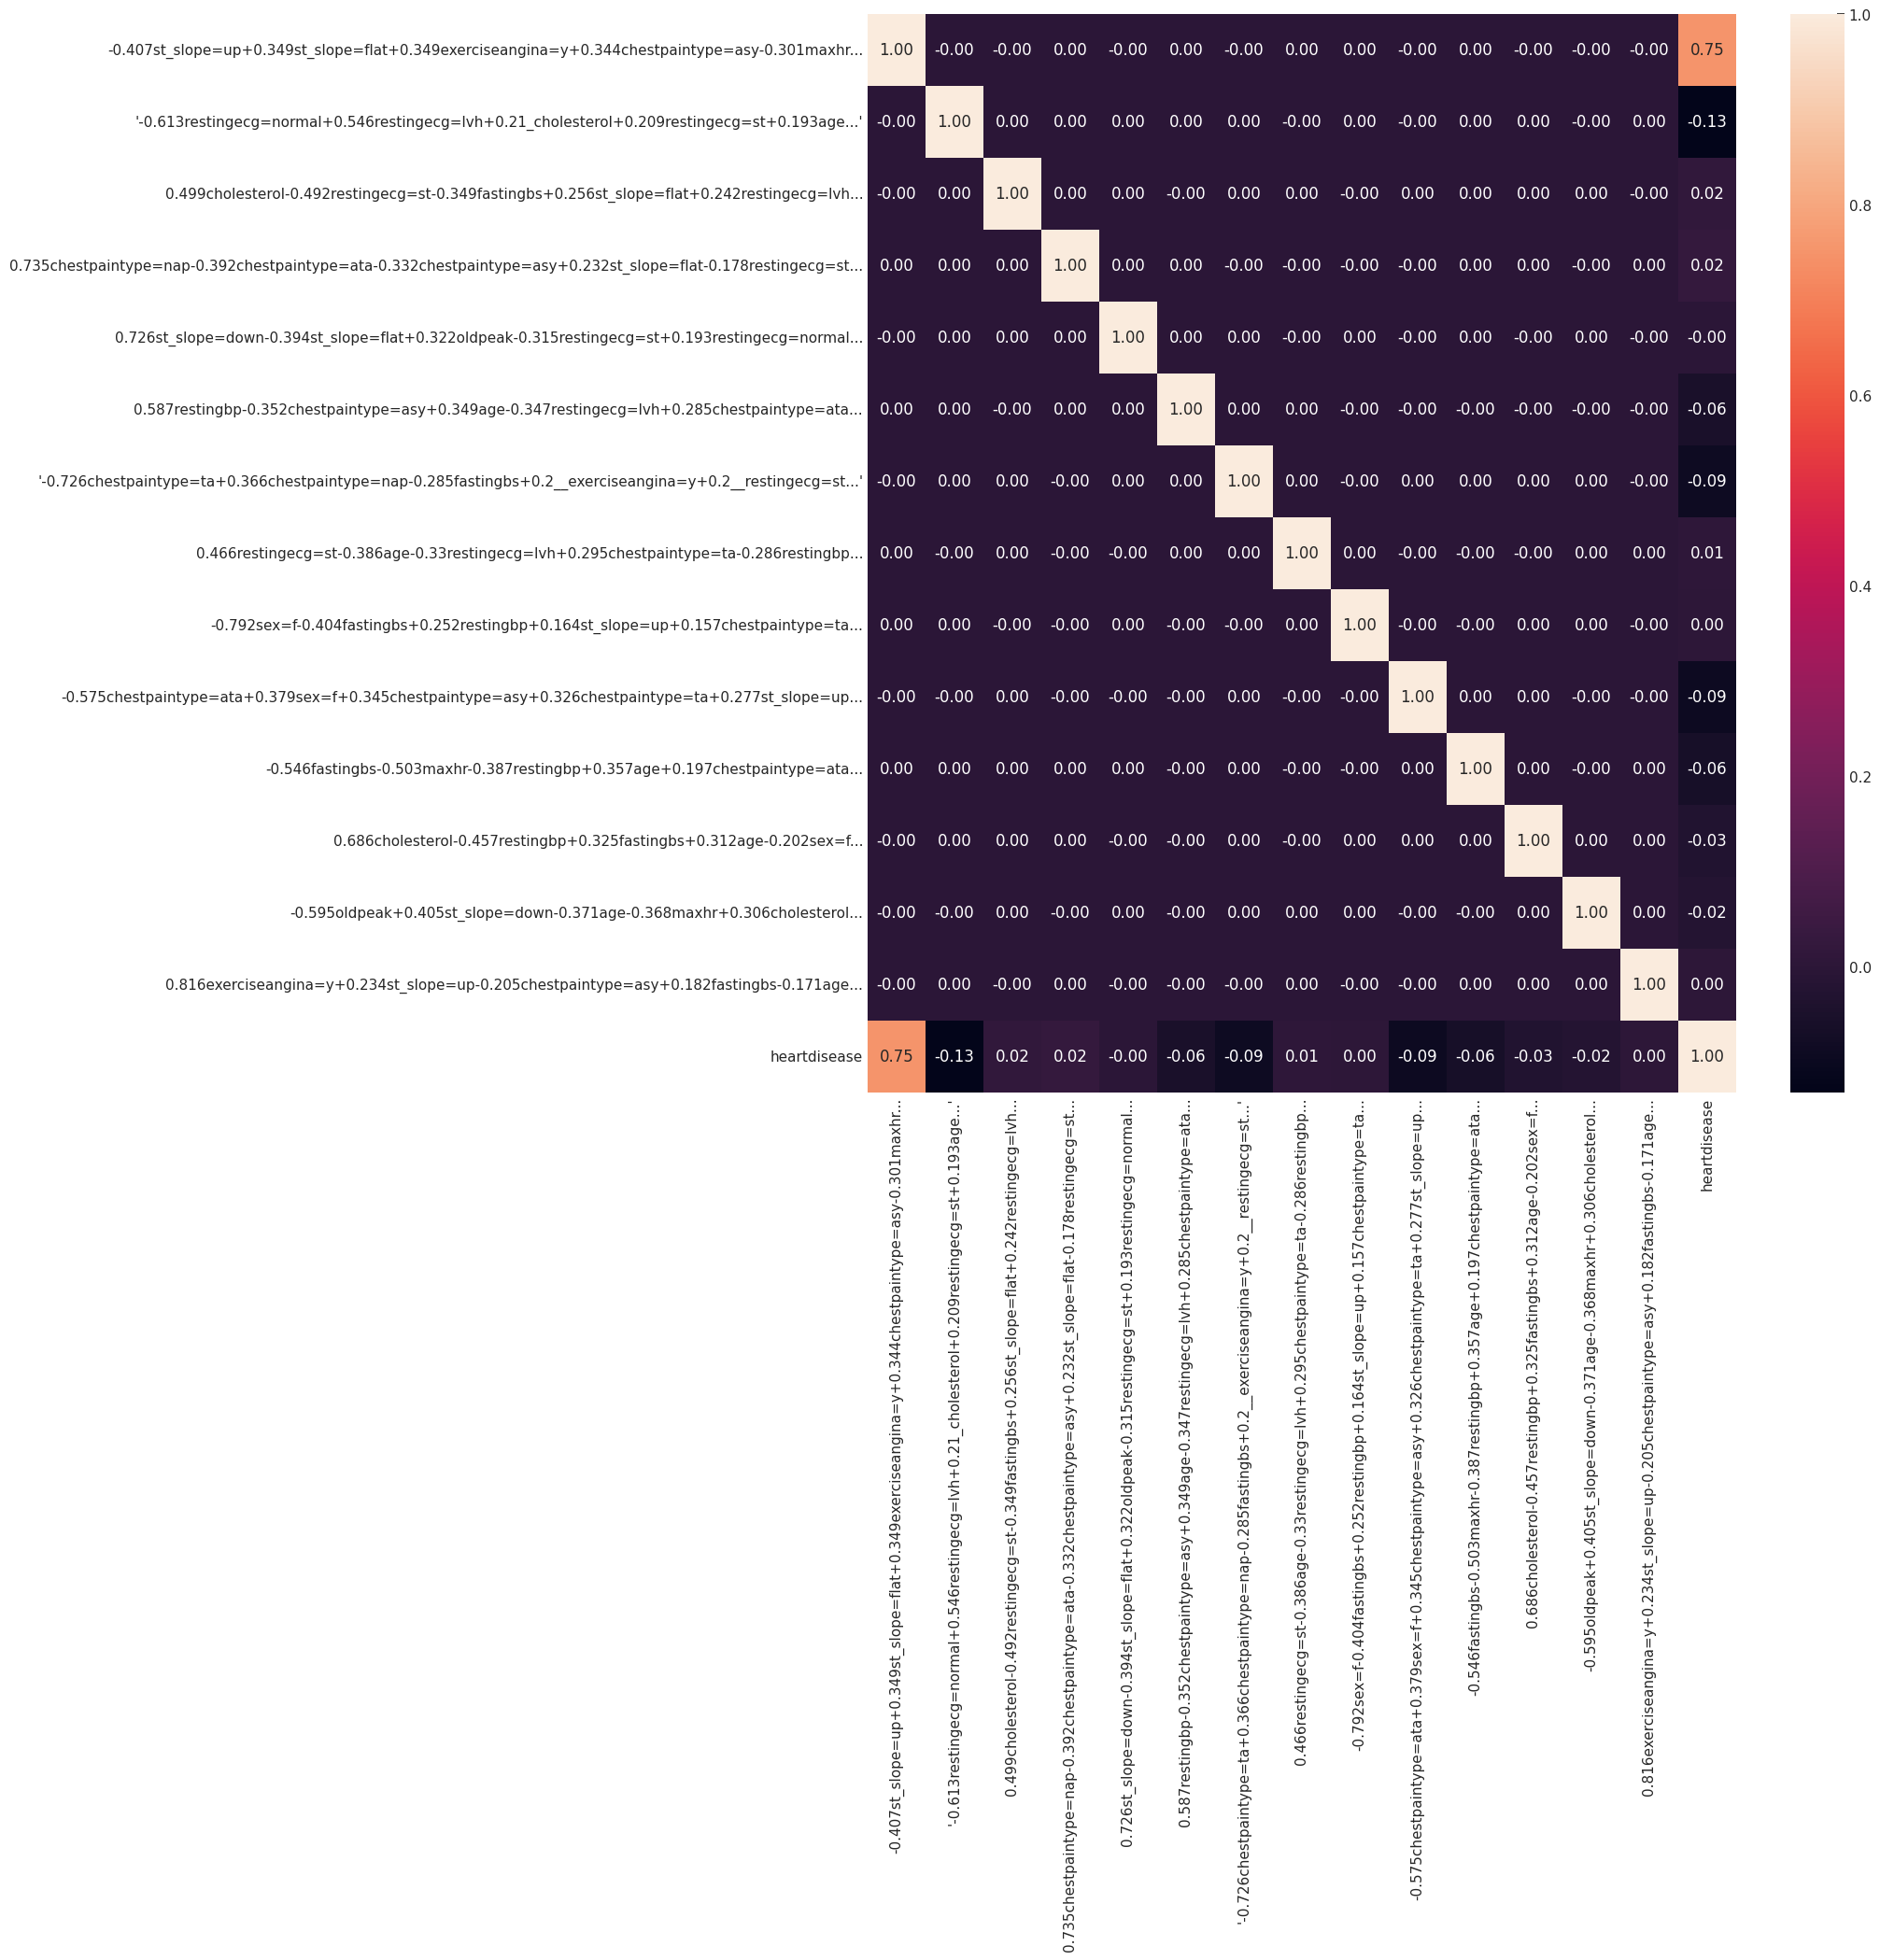

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), fmt='.2f', annot=True);

In [ ]:
#tranforming categorical data to numerical
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
for column in df:
    df[column] = labelencoder.fit_transform(df[column])
df.head()

-0.407st_slope=up+0.349st_slope=flat+0.349exerciseangina=y+0.344chestpaintype=asy-0.301maxhr...  \
0                                                 31                                                 
1                                                440                                                 
2                                                275                                                 
3                                                732                                                 
4                                                291                                                 

   '-0.613restingecg=normal+0.546restingecg=lvh+0.21_cholesterol+0.209restingecg=st+0.193age...'  \
0                                                457                                               
1                                                586                                               
2                                                694                                               
3                                                164                                               
4                                                517                                               

   0.499cholesterol-0.492restingecg=st-0.349fastingbs+0.256st_slope=flat+0.242restingecg=lvh...  \
0                                                641                                              
1                                                844                                              
2                                                 99                                              
3                                                957                                              
4                                                254                                              

   0.735chestpaintype=nap-0.392chestpaintype=ata-0.332chestpaintype=asy+0.232st_slope=flat-0.178restingecg=st...  \
0                                                111                                                               
1                                                978                                                               
2                                                  0                                                               
3                                                542                                                               
4                                                842                                                               

   0.726st_slope=down-0.394st_slope=flat+0.322oldpeak-0.315restingecg=st+0.193restingecg=normal...  \
0                                                540                                                 
1                                                243                                                 
2                                                 36                                                 
3                                                228                                                 
4                                                732                                                 

   0.587restingbp-0.352chestpaintype=asy+0.349age-0.347restingecg=lvh+0.285chestpaintype=ata...  \
0                                                692                                              
1                                                918                                              
2                                                579                                              
3                                                625                                              
4                                                800                                              

   '-0.726chestpaintype=ta+0.366chestpaintype=nap-0.285fastingbs+0.2__exerciseangina=y+0.2__restingecg=st...'  \
0                                                395                                                            
1                                                853           

In [ ]:
# A function that returns value counts for a column split by status
def groupby_get_cc_count(tdf, col):
    tdf = tdf.groupby([col, "heartdisease"])["heartdisease"].count().reset_index(level = 0)
    tdf.columns = [col, "count"]
    tdf = tdf.reset_index()
    return tdf

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 15 columns):
 #   Column                                                                                                         Non-Null Count  Dtype
---  ------                                                                                                         --------------  -----
 0   -0.407st_slope=up+0.349st_slope=flat+0.349exerciseangina=y+0.344chestpaintype=asy-0.301maxhr...                1016 non-null   int64
 1   '-0.613restingecg=normal+0.546restingecg=lvh+0.21_cholesterol+0.209restingecg=st+0.193age...'                  1016 non-null   int64
 2   0.499cholesterol-0.492restingecg=st-0.349fastingbs+0.256st_slope=flat+0.242restingecg=lvh...                   1016 non-null   int64
 3   0.735chestpaintype=nap-0.392chestpaintype=ata-0.332chestpaintype=asy+0.232st_slope=flat-0.178restingecg=st...  1016 non-null   int64
 4   0.726st_slope=down-0.394st_slope=flat+0.322oldpeak-0.315rest

In [ ]:
#Declaring the input (Independent) and output (Dependent attributes)
df_train = df.copy()
col_names = df_train.columns.tolist()
target_col = ["heartdisease"]
col_names.remove(target_col[0])
df_train = df_train[col_names + target_col]

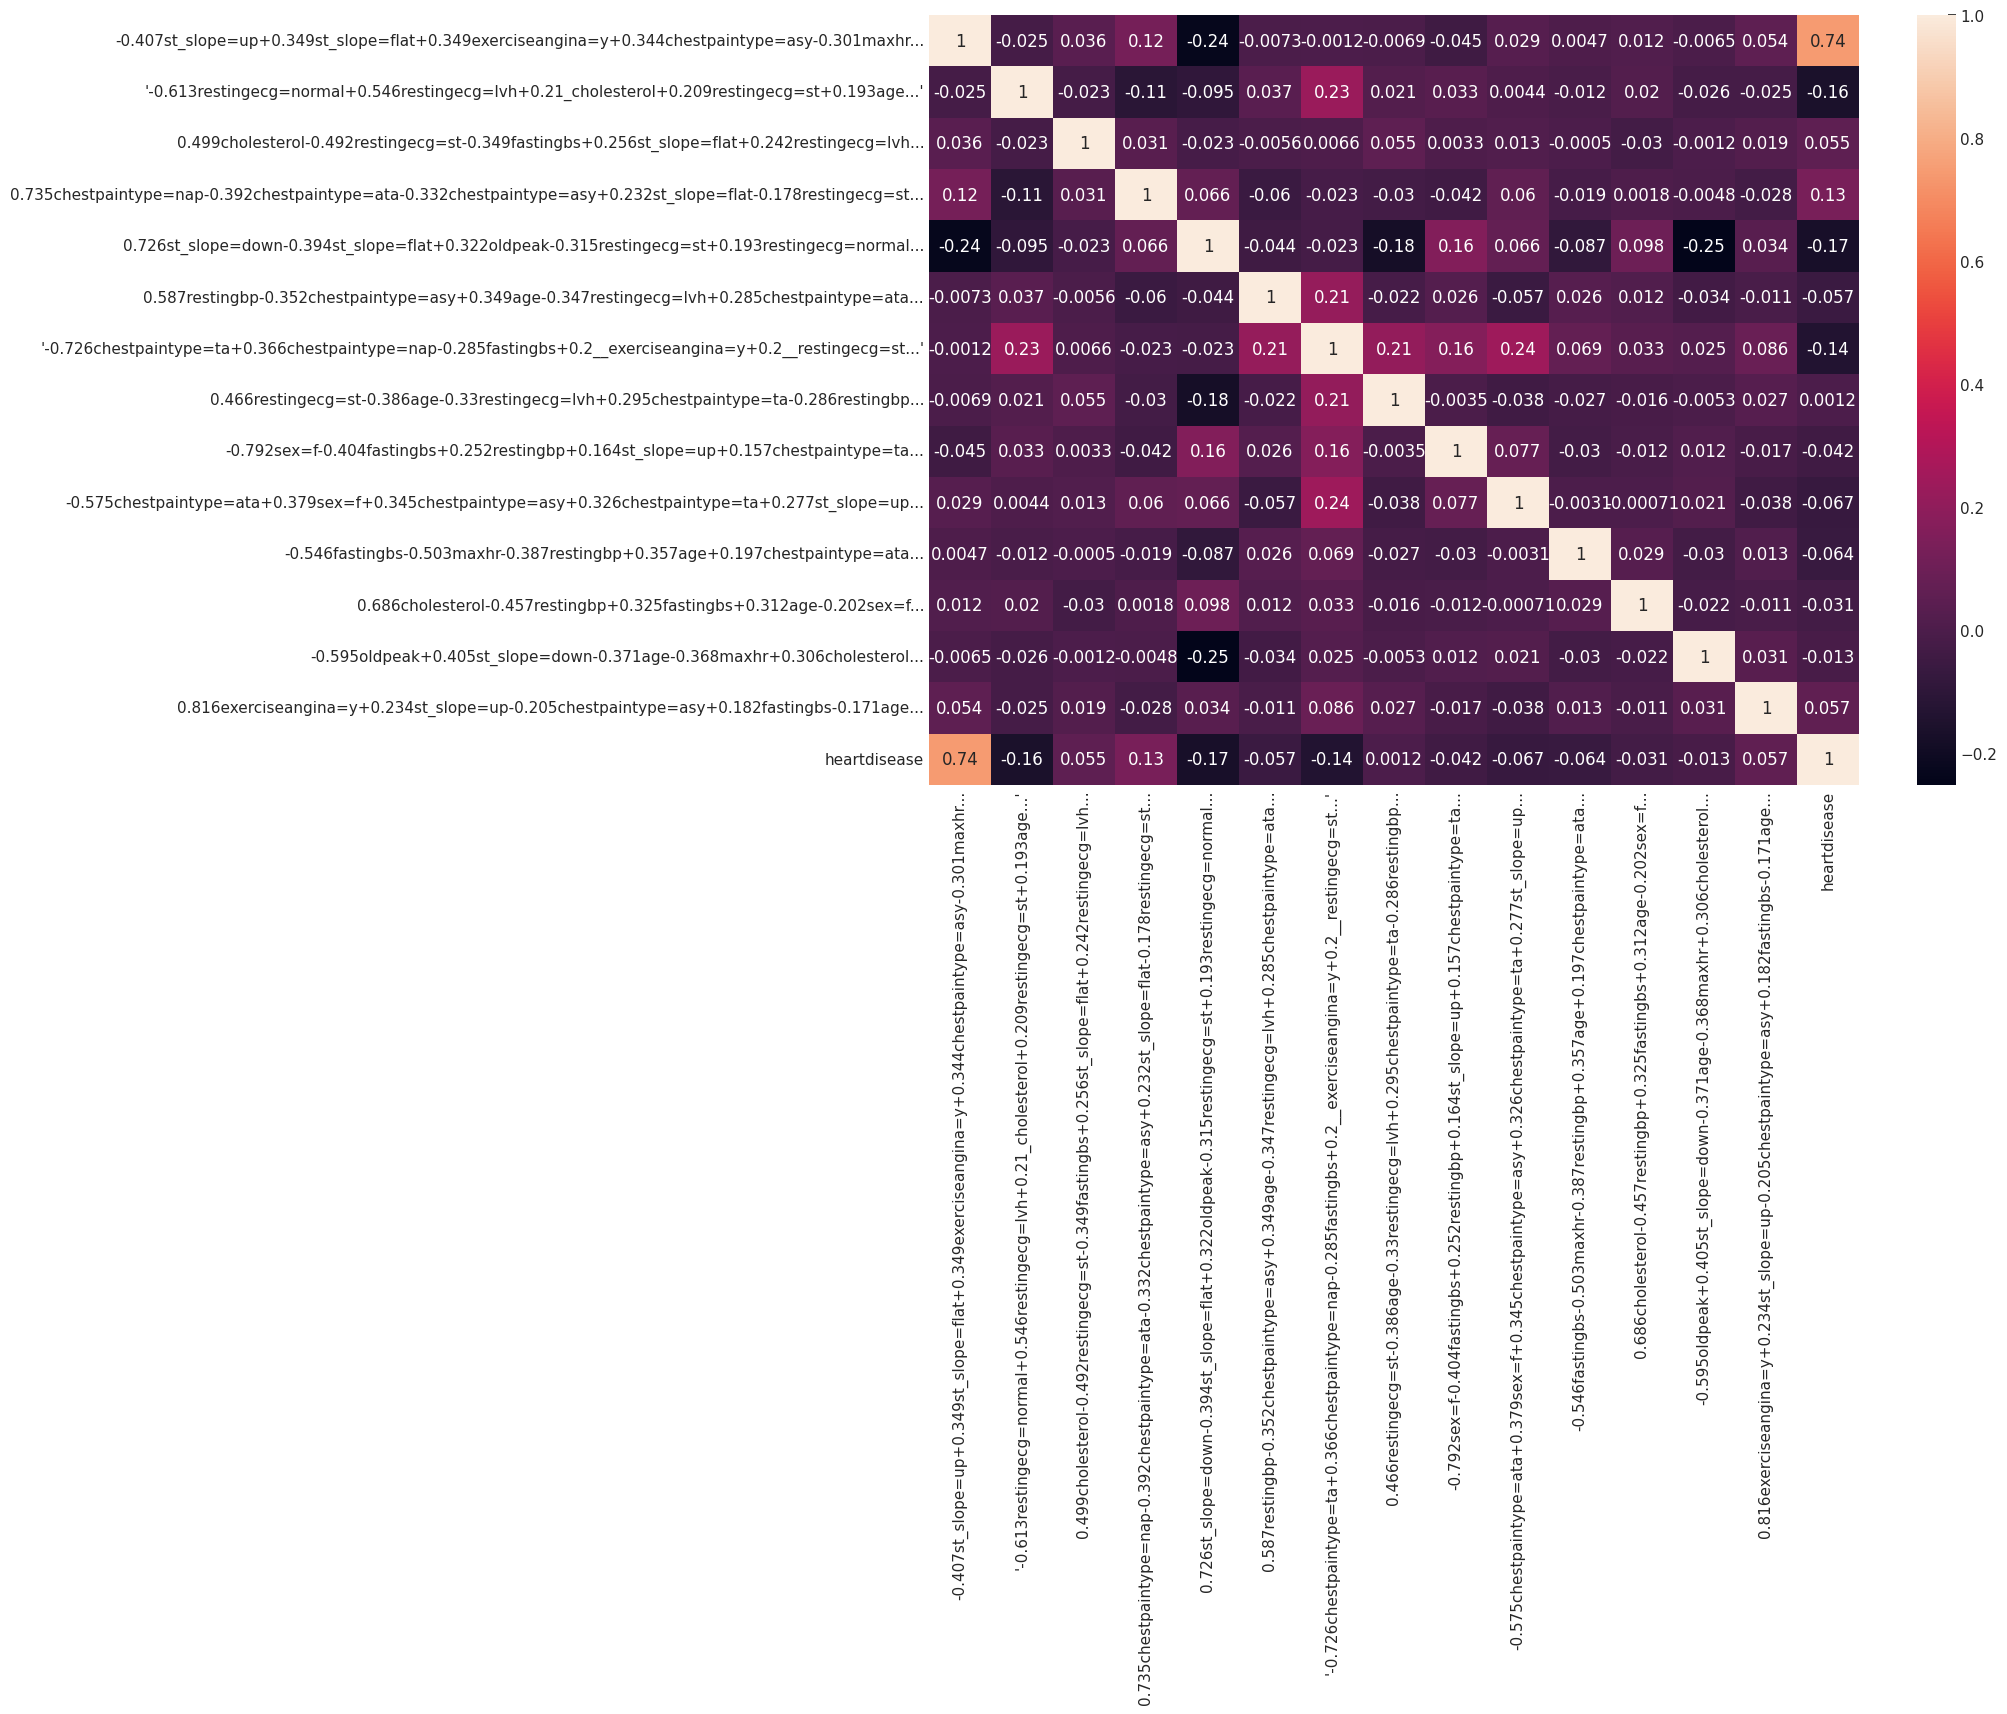

In [ ]:
plt.figure(figsize=(15,10))
corr = df_train.corr()
sns.heatmap(corr, annot=True, fmt='.2g');

In [ ]:
len(df_train[col_names].columns)

14

In [ ]:
X = df_train[col_names]      # Contains the independent columns
y = df_train[target_col]     # Our target column

In [ ]:
#Splitting of training and testing data (70/30)
train_X , test_X, train_y, test_y = train_test_split (X, y, test_size = 0.3, random_state = 323)
train_y = train_y["heartdisease"]
test_y = test_y["heartdisease"]

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
#ann = tf.keras.models.Sequential()
import tensorflow as tf
tf.random.set_seed(7)


In [ ]:
def ann_classifier():
  ann = Sequential()
  ann.add(Dense(units=16,activation='relu',input_dim=14))
  ann.add(Dense(units=8,activation='relu'))

  ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
  ann.compile(optimizer='adam',loss='binary_crossentropy' ,metrics= ['accuracy'])
  return ann

#seed = 7
#np.random.seed(seed)
ann = KerasClassifier(build_fn = ann_classifier,batch_size =2,epochs= 100)

In [ ]:
ann.fit(train_X,train_y,epochs=100)

Epoch 1/100
356/356 [==============================] - 1s 1ms/step - loss: 69.0071 - accuracy: 0.5921
Epoch 2/100
356/356 [==============================] - 0s 1ms/step - loss: 10.7839 - accuracy: 0.7525
Epoch 3/100
356/356 [==============================] - 0s 1ms/step - loss: 6.8322 - accuracy: 0.7932
Epoch 4/100
356/356 [==============================] - 0s 1ms/step - loss: 5.3554 - accuracy: 0.8101
Epoch 5/100
356/356 [==============================] - 0s 1ms/step - loss: 3.9808 - accuracy: 0.8031
Epoch 6/100
356/356 [==============================] - 0s 1ms/step - loss: 3.8798 - accuracy: 0.8143
Epoch 7/100
356/356 [==============================] - 0s 1ms/step - loss: 3.2294 - accuracy: 0.8326
Epoch 8/100
356/356 [==============================] - 0s 1ms/step - loss: 2.9399 - accuracy: 0.8467
Epoch 9/100
356/356 [==============================] - 1s 2ms/step - loss: 2.7079 - accuracy: 0.8481
Epoch 10/100
356/356 [==============================] - 1s 2ms/step - loss: 3.0664 - accu

10/10 [==============================] - 0s 1ms/step


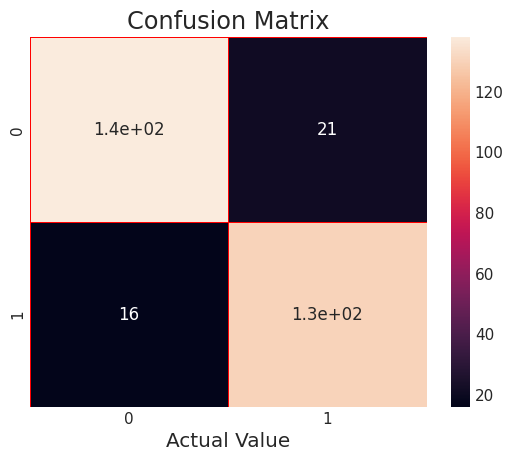

True negative 138
False positive 21
False negative 16
True positive 130
Accuracy rate: 87.869
Sensitivy/recall (TP/TP+FN): 0.89041
False positive rate (FP/FP+TN): 0.13208
False positive rate (1-specificity): 0.13208


In [ ]:
y_pred6=ann.predict(test_X)
from sklearn.metrics import confusion_matrix
cm6= confusion_matrix(test_y,y_pred6)
ax=plt.subplot()
sns.heatmap(cm6,annot=True,linewidth=0.5,linecolor='red',ax=ax)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()
tn6, fp6, fn6, tp6 = confusion_matrix(test_y,y_pred6).ravel()
print("True negative {}".format(tn6))
print("False positive {}".format(fp6))
print("False negative {}".format(fn6))
print("True positive {}".format(tp6))
accuracy= ((float(tp6)+float(tn6))/(float(tp6)+float(tn6)+float(fp6)+float(fn6)))*100
print ('Accuracy rate: {:.3f}'.format(accuracy))
sensitivity6 = float(tp6)/(float(tp6)+float(fn6))
print ('Sensitivy/recall (TP/TP+FN): {:.5f}'.format(sensitivity6))
#False positive rate
print ('False positive rate (FP/FP+TN): {:.5f}'.format(float(fp6)/(float(fp6)+float(tn6))))
print ('False positive rate (1-specificity): {:.5f}'.format(1-(float(tn6)/(float(tn6)+float(fp6)))))